In [1]:
import pandas as pd


In [2]:
import numpy as np


In [4]:
import seaborn as sns

In [5]:

data = {
    "Age": [25, 30, np.nan, 40, 28, 1000],      # 1000 is an outlier
    "Salary": [50000, 60000, 55000, np.nan, 58000, 999999],  # 999999 is an outlier
    "Department": ["HR", "IT", "IT", "Finance", np.nan, "HR"]
}

df = pd.DataFrame(data)

# Save CSV (optional)
df.to_csv("data.csv", index=False)

# Show dataset
df


,Age,Salary,Department
0,25.0,50000.0,HR
1,30.0,60000.0,IT
2,NaN,55000.0,IT
3,40.0,NaN,Finance
4,28.0,58000.0,NaN
5,1000.0,999999.0,HR


In [6]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Verify missing values handled
df.isnull().sum()


Age           0
Salary        0
Department    0
dtype: int64

In [7]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Clip values to remove outliers
    df[col] = np.clip(df[col], lower, upper)


df.describe()


,Age,Salary
count,6.000000,6.000000
mean,34.000000,57708.333333
std,9.736529,5005.413736
min,25.000000,50125.000000
25%,28.500000,55750.000000
50%,30.000000,58000.000000
75%,37.500000,59500.000000
max,51.000000,65125.000000


In [8]:
df


,Age,Salary,Department
0,25.0,50125.0,HR
1,30.0,60000.0,IT
2,30.0,55000.0,IT
3,40.0,58000.0,Finance
4,28.0,58000.0,HR
5,51.0,65125.0,HR


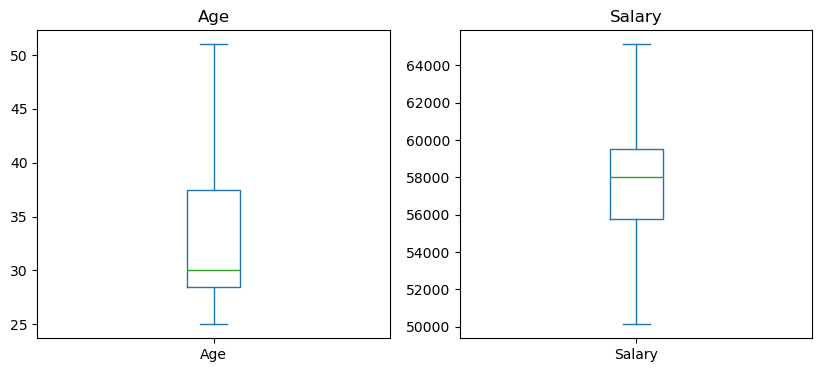

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df['Age'].plot.box()
plt.title("Age")

plt.subplot(1,2,2)
df['Salary'].plot.box()
plt.title("Salary")

plt.show()
